## Step 0. configurations

In [1]:
import warnings
warnings.filterwarnings("ignore")

## Step 1. reading data and importing libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [3]:
df = pd.read_csv("./coin_Bitcoin.csv")
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


## Step 2. understanding the data

In [4]:
df.shape

(2991, 10)

In [5]:
df.columns

Index(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close',
       'Volume', 'Marketcap'],
      dtype='object')

In [6]:
df.index

RangeIndex(start=0, stop=2991, step=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


In [8]:
df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,1496.000000,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,863.571653,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,1.000000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,748.500000,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,1496.000000,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,2243.500000,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


## Step 2b. Feature Engineering

Remove useless columns

In [9]:
df = df[["Open", "Date", "SNo"]]

Set column `Date` as index

In [10]:
import datetime

if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"]).dt.strftime("%Y-%m-%d")
    df.set_index("Date", inplace=True)


In [11]:
df.head()

,Open,SNo
Date,,
2013-04-29,134.444000,1
2013-04-30,144.000000,2
2013-05-01,139.000000,3
2013-05-02,116.379997,4
2013-05-03,106.250000,5


## Step 3. Visualizing

In [12]:
numerical_columns = df.select_dtypes(include="number").columns
numerical_columns

Index(['Open', 'SNo'], dtype='object')

In [13]:
categorical_columns = df.select_dtypes(include="object").columns
categorical_columns

Index([], dtype='object')

### **Distributions**

Not useful

### **Time Series**

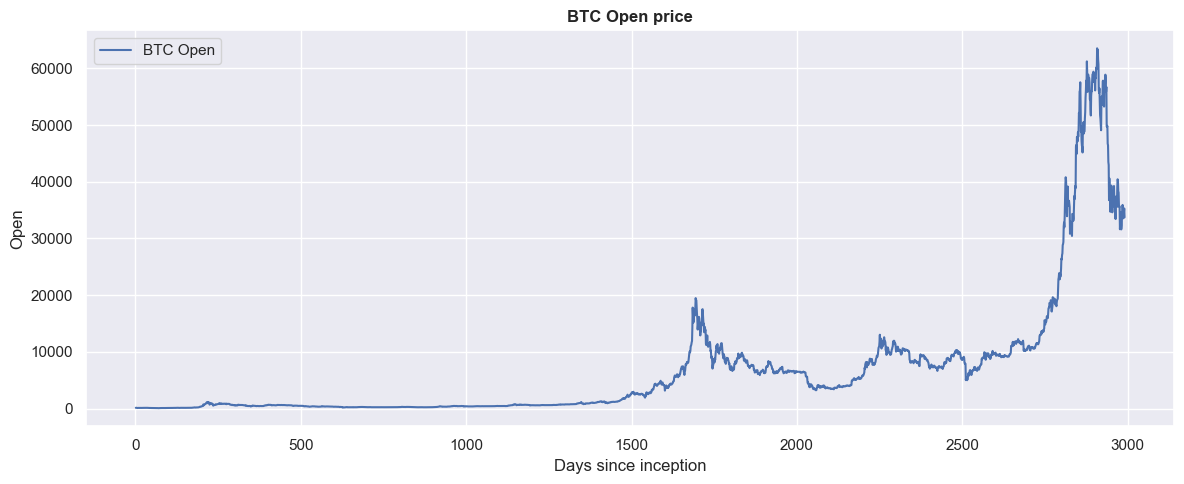

In [14]:
plt.figure(figsize=(12, 5))

sns.lineplot(data=df, x=df.SNo, y=df.Open, label="BTC Open")

plt.title("BTC Open price", fontweight="bold")
plt.xlabel("Days since inception")
plt.legend()
plt.tight_layout()
plt.show()

### **Correlations**

Not useful

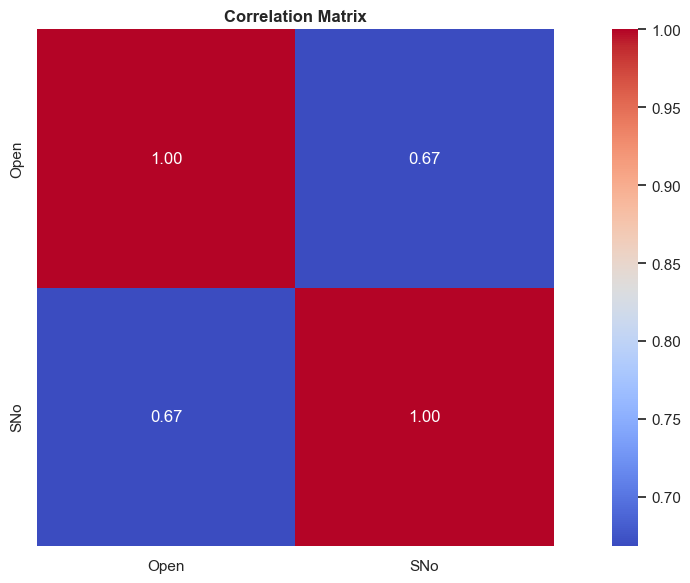

In [15]:
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, 
    annot=True, 
    square=True, 
    cmap="coolwarm", 
    fmt=".2f",
)
plt.title("Correlation Matrix", fontweight="bold")

plt.tight_layout()
plt.show()

### **Boxplot**

Not useful

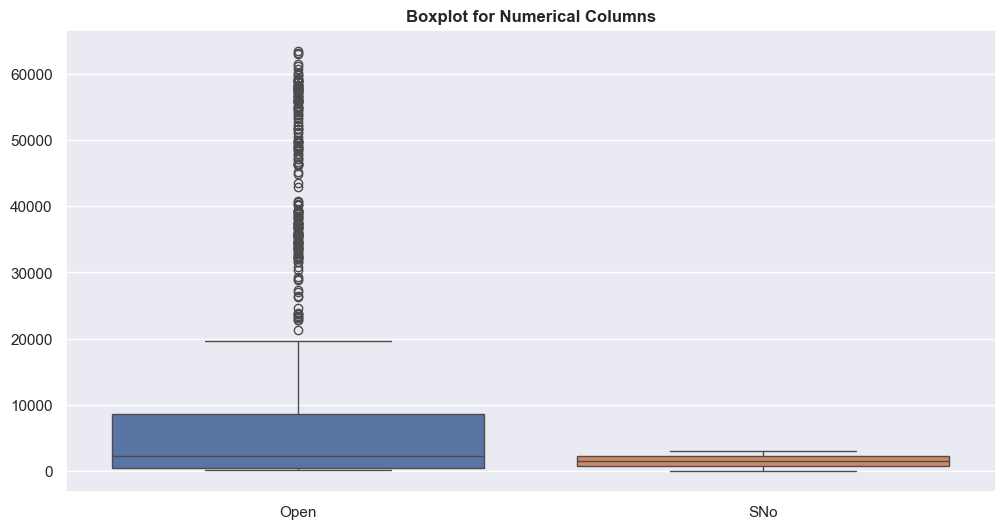

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns])
plt.title("Boxplot for Numerical Columns", fontweight="bold")
plt.show()

## Step 4. Deal with missing values

There are 0 missing values

In [17]:
def show_missing_count():
    missing_df = pd.DataFrame(df.isna().sum(), columns=["missing_count"])
    missing_df = missing_df[missing_df["missing_count"] > 0]

    return missing_df

show_missing_count()

,missing_count


## Step 5: Modelling

The goal for this dataset is to create a regression model that can forecast the column `Open`

### Import modelling libraries

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder

# TensorFlow and Keras imports
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.python.keras.callbacks import EarlyStopping

    # Optimizers
from keras.optimizers import Adam

    # Reguliarizers
from keras.regularizers import l2


In [19]:
df.columns

Index(['Open', 'SNo'], dtype='object')

In [20]:
# X = df.drop(columns=["Open"]).values
# y = df["Open"]

In [21]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Open'].values.reshape(-1,1))

### Creating Input Data for LSTM

In [22]:
def create_dataset(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60

### train_test_split

In [23]:
# Create the training and testing datasets
X_train, y_train = create_dataset(scaled_data, time_step)

# Reshape the data for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

### Architecture, Compile and Fit

In [24]:
def fit_model(X_train, y_train):
    model = Sequential()
    
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(1,activation='linear'))

    model.compile(loss = "mean_squared_error", optimizer = "adam")
    
    early_stopping =  EarlyStopping(patience=10,  restore_best_weights=True)
    model.fit(X_train, y_train, epochs = 128, batch_size = 32, 
              verbose = 1, validation_split=0.2, 
              callbacks=[early_stopping]
              )


    return(model)

# Train the model
model1 = fit_model(X_train, y_train)

Epoch 1/128
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0017 - val_loss: 0.0043
Epoch 2/128
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 1.0602e-04 - val_loss: 0.0022
Epoch 3/128
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 8.6088e-05 - val_loss: 0.0028
Epoch 4/128
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 7.2557e-05 - val_loss: 0.0032
Epoch 5/128
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 6.9773e-05 - val_loss: 0.0044
Epoch 6/128
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 8.9799e-05 - val_loss: 0.0070
Epoch 7/128
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 6.8905e-05 - val_loss: 0.0072
Epoch 8/128
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 5.1089e-05 - val_loss: 0.0039
Epoch 9/128
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 5.0482e-05 - val_loss: 0.0029
Epoch 10/128
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 5.1217e-05 - val_loss: 0.0052
Epoch 11/128
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 5.0137e-05 - val_loss: 0.0041
Epoch 12/128

In [25]:
from sklearn.metrics import mean_squared_error

def predict_and_score(model, X, Y):
    # Make predictions on the original scaled data
    pred = scaler.inverse_transform(model.predict(X))
    
    # Apply an inverse scale transform on the normalised data
    orig_data = scaler.inverse_transform([Y])
    
    # Calculate RMSE.
    score =np.sqrt(mean_squared_error(orig_data[0], pred[:, 0]))
    
    
    return(score, pred)

r2_train, train_predict = predict_and_score(model1, X_train, y_train)   

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [26]:
r2_train

1454.370072432413

In [27]:
train_predict

array([[  239.92465],
       [  239.66331],
       [  239.04515],
       ...,
       [33625.35   ],
       [33619.332  ],
       [33661.47   ]], dtype=float32)

Make a plot of the results, we give the training and validation set a different color. 

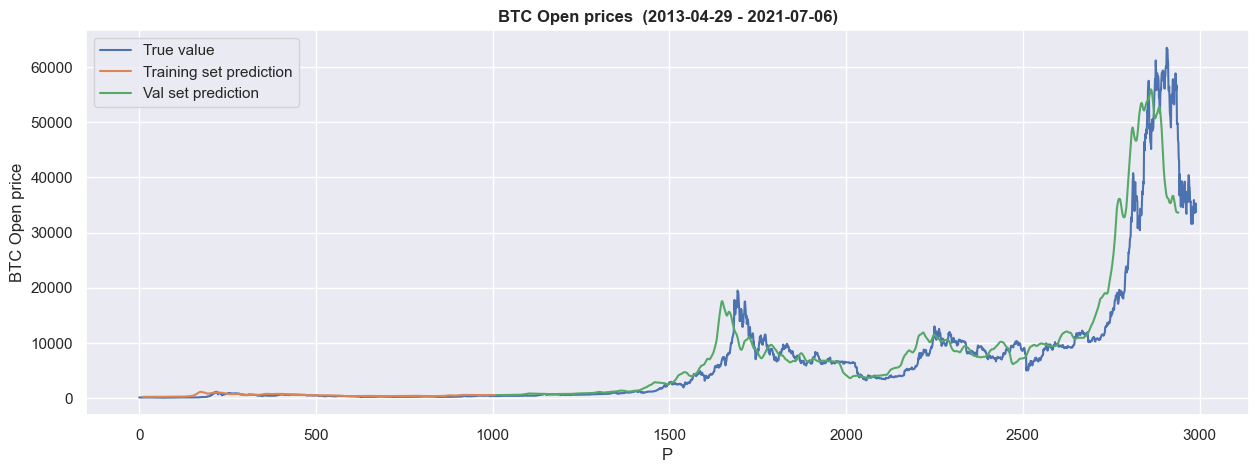

In [28]:
window_size = 10

# train predictions.
train_predict_plot = np.empty_like(scaled_data)
train_predict_plot[:, :] = np.nan
train_predict_plot[(window_size):1000 + window_size, :] = train_predict[0:1000]

# test predictions.
val_predict_plot = np.empty_like(scaled_data)
val_predict_plot[:, :] = np.nan
val_predict_plot[ 1000 + window_size:len(train_predict) + window_size, :] = train_predict[1000:len(train_predict)]

# Plot.
plt.figure(figsize = (15, 5))
plt.plot(scaler.inverse_transform(scaled_data), label = "True value")
plt.plot(train_predict_plot, label = "Training set prediction")
plt.plot(val_predict_plot, label = "Val set prediction")
plt.xlabel("P")
plt.ylabel("BTC Open price")
plt.title("BTC Open prices  (2013-04-29 - 2021-07-06)", fontweight="bold")
plt.legend()
plt.show()

## Step 6. Forecasting

In [29]:
# Prepare the input data for prediction
last_60_days = scaled_data[-time_step:]
X_test = []
X_test.append(last_60_days)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions
predicted_price = model1.predict(X_test)

# Inverse scaling to get the predicted price in the original scale
predicted_price = scaler.inverse_transform(predicted_price)

print("Predicted Bitcoin price:", predicted_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Bitcoin price: [[33672.73]]


In [30]:
# Number of days to predict
num_days = 180

# Prepare the input data for prediction
last_60_days = scaled_data[-time_step:]
X_test = []
X_test.append(last_60_days)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_prices = []

for i in range(num_days):
    # Make predictions for the next day
    predicted_price = model1.predict(X_test)
    predicted_prices.append(predicted_price[0][0])
    
    # Update input data for the next prediction
    new_input = np.array([predicted_price])
    X_test = np.append(X_test[:,1:,:], new_input, axis=1)

# Inverse scaling to get the predicted prices in the original scale
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

print("Predicted Bitcoin prices for the next 30 days:", predicted_prices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

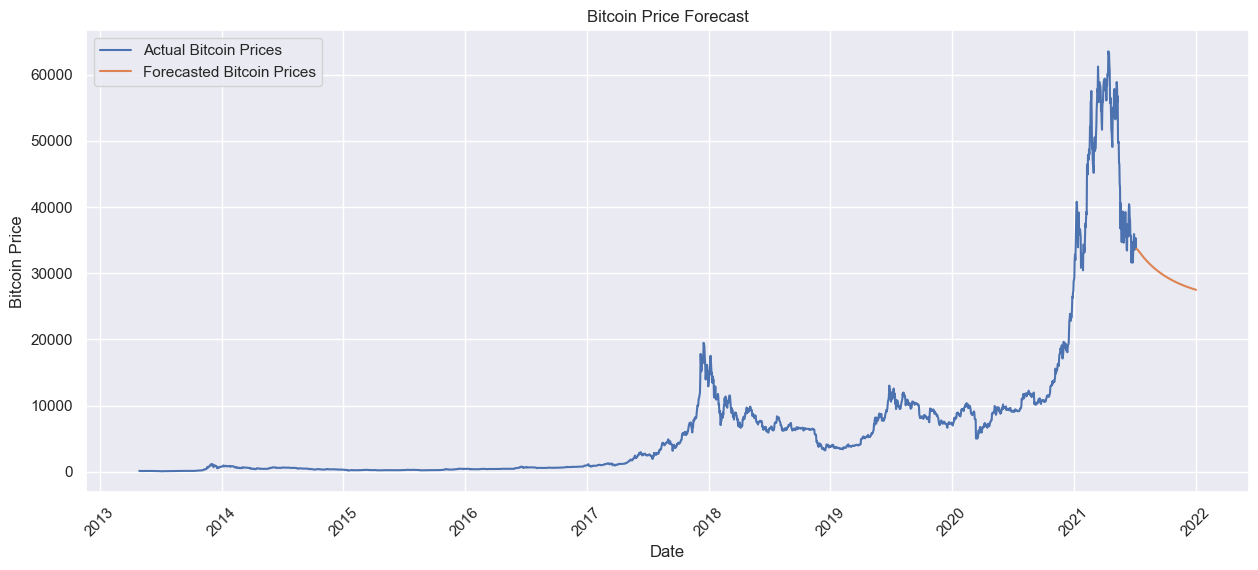

In [31]:
df.index = pd.to_datetime(df.index)

# Generate dates for the forecasted period
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=num_days, freq='D')

plt.figure(figsize=(15, 6))

# Plot the actual df
plt.plot(df.index, df['Open'], label='Actual Bitcoin Prices')

# Plot the forecasted prices
plt.plot(forecast_dates, predicted_prices, label='Forecasted Bitcoin Prices')

plt.title('Bitcoin Price Forecast')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The dataset only contains data until `2021-07-06`. So, to compare our model with what actually happened with BTC, we need to check [Google Finance](https://www.google.com/finance/quote/BTC-USD?hl=en&window=MAX)'s Real-time Quote for Bitcoin (BTC)

![image](./public/GoogleFinance.png)

Our model predicts the price of Bitcoin to go **DOWN** from mid-2021 onwards to 2022. This was not completely the case (because it went up around Q3 2022).

And it did go **DOWN** after the small peak, so I guess the model is fine?

This proves Bitcoin is unpredictable ...